In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
plt.style.use('seaborn')

In [2]:
df_meal = pd.read_csv("meal_info.csv")

In [3]:
df_meal.head()

,meal_id,category,cuisine
0,1885,Beverages,Thai
1,1993,Beverages,Thai
2,2539,Beverages,Thai
3,1248,Beverages,Indian
4,2631,Beverages,Indian


In [4]:
df_center = pd.read_csv('fulfilment_center_info.csv') 
df_center.head()

,center_id,city_code,region_code,center_type,op_area
0,11,679,56,TYPE_A,3.7
1,13,590,56,TYPE_B,6.7
2,124,590,56,TYPE_C,4.0
3,66,648,34,TYPE_A,4.1
4,94,632,34,TYPE_C,3.6


In [5]:
df_food = pd.read_csv('train.csv') 
df_food.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
0,1379560,1,55,1885,136.83,152.29,0,0,177
1,1466964,1,55,1993,136.83,135.83,0,0,270
2,1346989,1,55,2539,134.86,135.86,0,0,189
3,1338232,1,55,2139,339.50,437.53,0,0,54
4,1448490,1,55,2631,243.50,242.50,0,0,40


In [6]:
df = pd.merge(df_food,df_center,on='center_id') 
df = pd.merge(df,df_meal,on='meal_id')

### 1. Bar Graph using matplotlib

First, we want to find the most popular food item that customers have bought from the company.

I will be using the Pandas pivot_table function to find the total number of orders for each category of the food item:

###### Bar graphs are best used when we need to compare the quantity of categorical values within the same category.

In [7]:
table = pd.pivot_table(data=df,index='category',values='num_orders',aggfunc=np.sum)
table

,num_orders
category,
Beverages,40480525
Biryani,631848
Desert,1940754
Extras,3984979
Fish,871959
Other Snacks,4766293
Pasta,1637744
Pizza,7383720
Rice Bowl,20874063


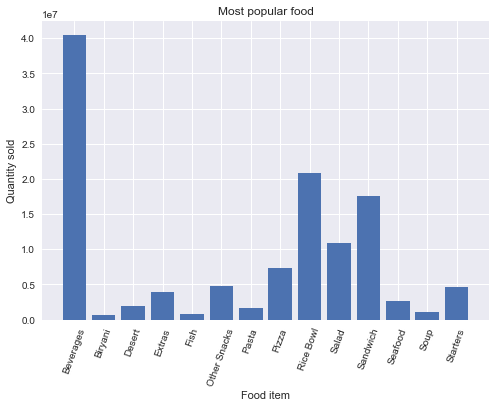

In [10]:
#bar graph
plt.bar(table.index,table['num_orders'])

#xticks 
plt.xticks(rotation=70) 

#x-axis labels 
plt.xlabel('Food item') 

#y-axis labels 
plt.ylabel('Quantity sold') 

#plot title 
plt.title('Most popular food') 

#save plot 
#plt.savefig('matplotlib_plotting_6.png',dpi=300,bbox_inches='tight') 

#display plot 
plt.show();

It is always important to label your axis. You can do this by employing the plt.xlabel() and plt.ylabel() functions. You can use plt.title() for naming the title of the plot. If your xticks are overlapping, rotate them using the rotate parameter in plt.xticks() so that they are easy to view for the audience.

You can save your plot using the plt.savefig() function by providing the file path as a parameter. Finally, always display your plot using plt.show().

While analyzing the plot, we can see that Beverages were the most popular food item sold by the company. Wait, was it because they were sold with almost all the meals? Was Rice Bowl the most popular food item?

Let’s divide the total food item order by the number of unique meals it is present in.

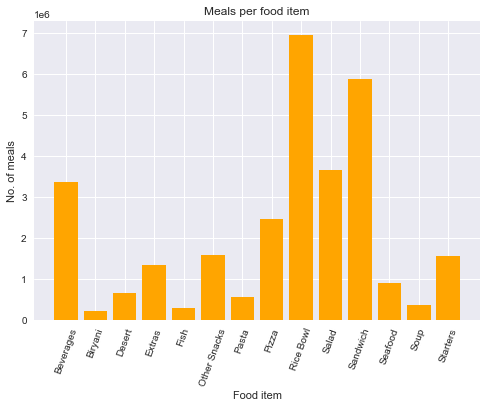

In [12]:
#dictionary for meals per food item
item_count = {}

for i in range(table.index.nunique()):
    item_count[table.index[i]] = table.num_orders[i]/df_meal[df_meal['category']==table.index[i]].shape[0]

#bar plot 
plt.bar([x for x in item_count.keys()],[x for x in item_count.values()],color='orange')

#adjust xticks
plt.xticks(rotation=70)

#label x-axis
plt.xlabel('Food item')

#label y-axis
plt.ylabel('No. of meals')

#label the plot
plt.title('Meals per food item')

#save plot
#plt.savefig('matplotlib_plotting_7.png',dpi=300,bbox_inches='tight')

#display plot
plt.show();

## 2. Pie Chart using matplotlib

A pie chart is suitable to show the proportional distribution of items within the same category.

In [14]:
#dictionary for cuisine and its total orders
d_cuisine = {}

#total number of order
total = df['num_orders'].sum()

#find ratio of orders per cuisine
for i in range(df['cuisine'].nunique()):

#cuisine
    c = df['cuisine'].unique()[i]

#num of orders for the cuisine
c_order = df[df['cuisine']==c]['num_orders'].sum()
d_cuisine[c] = c_order/total

<ipython-input-16-02050153b680>:2: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  plt.pie([x for x in d_cuisine.values()],labels=[x for x in d_cuisine.keys()],autopct='%0.1f',explode=[0,0,0.1,0])


ValueError: 'explode' must be of length 'x'

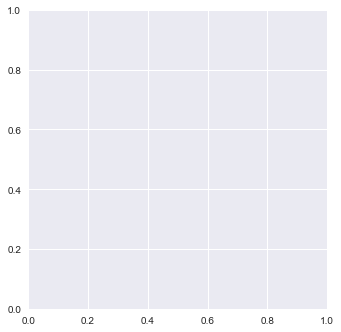

In [16]:
#pie plot 
plt.pie([x*100 for x in d_cuisine.values()],labels=[x for x in d_cuisine.keys()],autopct='%0.1f',explode=[0,0,0.1,0]) 

#label the plot 
plt.title('Cuisine share %') 
#plt.savefig('matplotlib_plotting_8.png',dpi=300,bbox_inches='tight') 
plt.show();

1. I used plt.pie() to draw the pie chart and adjust its parameters to make it more appealing

2. The autopct parameter was used to print the values within the pie chart up to 1 decimal place

3. The explode parameter was used to offset the Italian wedge to make it stand out from the rest. This makes it instantly clear to the viewer that people love Italian food!

### 3. Box Plot using matplotlib

Box plot gives statistical information about the distribution of numeric data divided into different groups. It is useful for detecting outliers within each group.

1.The lower, middle and upper part of the box represents the 25th, 50th, and 75th percentile values respectively

2.The top whisker represents Q3+1.5*IQR

3.The bottom whisker represents Q1-1.5*IQR

4.Outliers are shown as scatter points

5.Shows skewness in the data

In [17]:
#dictionary for base price per cuisine
c_price = {}
for i in df['cuisine'].unique():
    c_price[i] = df[df['cuisine']==i].base_price

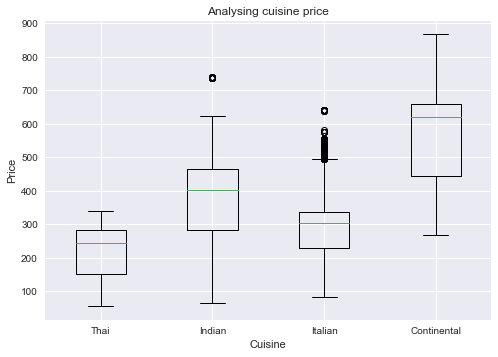

In [18]:
#plotting boxplot 
plt.boxplot([x for x in c_price.values()],labels=[x for x in c_price.keys()]) 

#x and y-axis labels 
plt.xlabel('Cuisine') 
plt.ylabel('Price') 

#plot title 
plt.title('Analysing cuisine price') 

#save and display 
#plt.savefig('C:\\Users\\Dell\\Desktop\\AV Plotting images\\matplotlib_plotting_9.png',dpi=300,bbox_inches='tight') 
plt.show();

Box plot does not show the distribution of data points within each group.